# Assignment for practical work 4. Basics of neural networks

Group:

*  Jannik Bucher
*  Dennis Imhof

### Using dataset: SkillCraft1 Master Table Dataset
[SkillCraft1 on UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/SkillCraft1+Master+Table+Dataset#)

#### Notes:

* Other than in assignment 2a we will now use the original response variable "LeagueIndex" for classification.

* Also, we will split the data into train and test set and perform cross-validation on the training data instead of splitting the training data into fixed train/validation sets.

# Assignment for practical work 4. Basics of neural networks
## General Assignment

Before performing the practical work, you need download the data set accordingly to the option on your machine
1. Write a program that splits the original sample into a training set and a test set (training set, validation set, test set)
2. Build a model using Perceptron (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) and MLPClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). On the basis of experiments, select values for learning rate, the regularization parameter, the optimization function.
3. Build learning curves for better explanation of your experiments.

## Options
Data sets are taken from the UCI Machine Learning Repository
https://archive.ics.uci.edu/ml/
The option is determined by the data set, which can be downloaded from the link above:
The option is determined by the data set, which can be downloaded from the link above:
1. Sponge
2. Water Treatment Plant
3. Synthetic Control Chart Time Series
4. Character Trajectories
5. Plants
6. Libras Movement
7. KEGG Metabolic Relation Network (Directed)
8. SMS Spam Collection
9. seeds
10. Human Activity Recognition Using Smartphones
11. User Knowledge Modeling
12. NYSK
13. Activities of Daily Living (ADLs) Recognition Using Binary Sensors
14. Dresses_Attribute_Sales
15. Wholesale customers
16. StoneFlakes
17. Gesture Phase Segmentation
18. AAAI 2014 Accepted Papers
19. Dow Jones Index
20. AAAI 2013 Accepted Papers
21. wiki4HE
22. Folio
23. Mice Protein Expression
24. Improved Spiral Test Using Digitized Graphics Tablet for Monitoring Parkinson’s Disease


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFromModel
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve, learning_curve

In [2]:
df = pd.read_csv("data/SkillCraft1_Dataset.csv")

In [3]:
#df = df.drop("GameID", axis=1)

In [4]:
response_label_names = ["Bronze", "Silver", "Gold", "Platinum", "Diamond", "Master", "GrandMaster", "Professional"]
# response_indices = range(1,9)
# response_labels = dict(zip(response_indices, response_label_names))
# response_labels

In [5]:
# df.LeagueIndex = df.LeagueIndex.apply(lambda x: response_labels[x])

In [6]:
# pd.LeagueIndex = pd.Series(pd.Categorical(df.LeagueIndex, categories=response_label_names, ordered=True), dtype="category")

In [7]:
df.LeagueIndex.describe()

count    3395.000000
mean        4.184094
std         1.517327
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         8.000000
Name: LeagueIndex, dtype: float64

### EDA

In [8]:
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [9]:
df.describe()

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [10]:
# No missing values in any of the columns
df.isnull().any()

GameID                  False
LeagueIndex             False
Age                     False
HoursPerWeek            False
TotalHours              False
APM                     False
SelectByHotkeys         False
AssignToHotkeys         False
UniqueHotkeys           False
MinimapAttacks          False
MinimapRightClicks      False
NumberOfPACs            False
GapBetweenPACs          False
ActionLatency           False
ActionsInPAC            False
TotalMapExplored        False
WorkersMade             False
UniqueUnitsMade         False
ComplexUnitsMade        False
ComplexAbilitiesUsed    False
dtype: bool

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
GameID                  3395 non-null int64
LeagueIndex             3395 non-null int64
Age                     3395 non-null object
HoursPerWeek            3395 non-null object
TotalHours              3395 non-null object
APM                     3395 non-null float64
SelectByHotkeys         3395 non-null float64
AssignToHotkeys         3395 non-null float64
UniqueHotkeys           3395 non-null int64
MinimapAttacks          3395 non-null float64
MinimapRightClicks      3395 non-null float64
NumberOfPACs            3395 non-null float64
GapBetweenPACs          3395 non-null float64
ActionLatency           3395 non-null float64
ActionsInPAC            3395 non-null float64
TotalMapExplored        3395 non-null int64
WorkersMade             3395 non-null float64
UniqueUnitsMade         3395 non-null int64
ComplexUnitsMade        3395 non-null float64
ComplexAbilitiesUsed    3395 non

In [12]:
# Though there were no None values in the dataset, closer inspection reveals missing values marked with "?"
# Convert the object-variables to numeric and set the missing values to None
missing_features = ["Age", "HoursPerWeek", "TotalHours"]

for col in missing_features:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [13]:
df.isna().sum()

GameID                   0
LeagueIndex              0
Age                     55
HoursPerWeek            56
TotalHours              57
APM                      0
SelectByHotkeys          0
AssignToHotkeys          0
UniqueHotkeys            0
MinimapAttacks           0
MinimapRightClicks       0
NumberOfPACs             0
GapBetweenPACs           0
ActionLatency            0
ActionsInPAC             0
TotalMapExplored         0
WorkersMade              0
UniqueUnitsMade          0
ComplexUnitsMade         0
ComplexAbilitiesUsed     0
dtype: int64

In [14]:
df.groupby("LeagueIndex").describe()

GameID                                                        \
             count          mean          std      min      25%      50%   
LeagueIndex                                                                
1            167.0   4427.359281  2497.138956     61.0   2327.0   3927.0   
2            347.0   4668.334294  2661.785466     60.0   2462.0   4421.0   
3            553.0   4725.052441  2710.086234     57.0   2404.0   4665.0   
4            811.0   4715.130703  2628.611247     56.0   2446.0   4743.0   
5            806.0   4704.777916  2693.406723     52.0   2313.0   5047.5   
6            621.0   4843.792271  2629.977338    138.0   2549.0   5227.0   
7             35.0   4683.771429  2867.112732     72.0   2052.5   4754.0   
8             55.0  10051.509091    25.894281  10001.0  10028.5  10052.0   

                                  Age             ... ComplexUnitsMade  \
                  75%      max  count       mean  ...              75%   
LeagueIndex                                       ...                    
1             6260.00   9224.0  167.0  22.724551  ...         0.000000   
2             6839.50   9243.0  347.0  22.155620  ...         0.000000   
3             6974.00   9270.0  553.0  22.050633  ...         0.000034   
4             6990.00   9271.0  811.0  21.981504  ...         0.000099   
5             7059.25   9264.0  806.0  21.362283  ...         0.000132   
6             7119.00   9255.0  621.0  20.677939  ...         0.000127   
7             7336.50   9202.0   35.0  21.171429  ...         0.000121   
8            10072.50  10095.0    0.0        NaN  ...         0.000000   

                      ComplexAbilitiesUsed                                \
                  max                count      mean       std  min  25%   
LeagueIndex                                                                
1            0.000318                167.0  0.000042  0.000096  0.0  0.0   
2            0.000494                347.0  0.000076  0.000200  0.0  0.0   
3            0.000590                553.0  0.000117  0.000257  0.0  0.0   
4            0.000786                811.0  0.000138  0.000245  0.0  0.0   
5            0.000902                806.0  0.000176  0.000282  0.0  0.0   
6            0.000781                621.0  0.000182  0.000293  0.0  0.0   
7            0.000386                 35.0  0.000267  0.000588  0.0  0.0   
8            0.000457                 55.0  0.000135  0.000246  0.0  0.0   

                                           
                  50%       75%       max  
LeagueIndex                                
1            0.000000  0.000045  0.000630  
2            0.000000  0.000057  0.001763  
3            0.000000  0.000129  0.002664  
4            0.000029  0.000176  0.002186  
5            0.000066  0.000229  0.003084  
6            0.000053  0.000269  0.002443  
7            0.000040  0.000235  0.002685  
8            0.000000  0.000128  0.000959  

[8 rows x 152 columns]

### Splitting the dataset into train/test

Before doing any modeling

In [15]:
train_X, test_X, train_y, test_y = train_test_split(df.drop("LeagueIndex",axis=1), 
                                                    df["LeagueIndex"], 
                                                    train_size=0.7, 
                                                    random_state=42)

### Feature normalization

Here we scale all numerical variables and impute the missing values in "Age", "HoursPerWeek" and "TotalHours".

In [16]:
remaining_features = train_X.columns.drop(missing_features)

numeric_transformer = Pipeline([('scale', StandardScaler())])
imputer = Pipeline([('impute', SimpleImputer(strategy='median')), 
                     ('scale', numeric_transformer)])



preprocessor = ColumnTransformer(
    transformers=[
        ('imp', imputer, missing_features),
        ('num', numeric_transformer, remaining_features)])

In [17]:
train_X = pd.DataFrame(preprocessor.fit_transform(train_X), columns=train_X.columns)

In [18]:
train_X.describe()

,GameID,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,2.376000e+03,2.376000e+03,2.376000e+03,2.376000e+03,2.376000e+03,2.376000e+03,2.376000e+03,2.376000e+03,2.376000e+03,2.376000e+03,2.376000e+03,2.376000e+03,2.376000e+03,2.376000e+03,2.376000e+03,2.376000e+03,2.376000e+03,2.376000e+03,2.376000e+03
mean,-2.104564e-16,-4.037175e-17,2.242875e-17,-7.177199e-17,-2.392400e-16,7.177199e-17,2.541925e-17,-1.315820e-16,9.719124e-17,1.166295e-16,-1.151342e-16,2.601735e-16,-6.018381e-16,-5.233375e-16,-1.943825e-16,6.205287e-17,-1.958777e-16,-4.186700e-17,5.382900e-17
std,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00
min,-1.368509e+00,-1.126495e+00,-7.478803e-01,-1.788035e+00,-1.863982e+00,-8.395836e-01,-1.669365e+00,-1.880793e+00,-5.948591e-01,-1.028416e+00,-2.772464e+00,-1.905258e+00,-2.025574e+00,-2.133977e+00,-2.298874e+00,-1.832498e+00,-2.432873e+00,-5.384766e-01,-5.289992e-01
25%,-6.424405e-01,-6.358645e-01,-4.059951e-01,-8.535812e-01,-7.265382e-01,-5.855737e-01,-7.532046e-01,-6.029079e-01,-5.948591e-01,-6.544677e-01,-7.193785e-01,-6.687333e-01,-6.848709e-01,-6.674470e-01,-6.922487e-01,-6.675598e-01,-8.267306e-01,-5.384766e-01,-5.289992e-01
50%,-1.583946e-01,-3.087777e-01,-1.702122e-01,5.256470e-02,-1.698743e-01,-3.484128e-01,-9.646948e-02,-1.769462e-01,-3.508204e-01,-2.823798e-01,-7.105596e-02,-2.151201e-01,-1.528493e-01,-1.208925e-01,-2.282138e-02,-2.326193e-01,-2.913499e-01,-5.384766e-01,-4.515787e-01
75%,5.676741e-01,3.453960e-01,1.834621e-01,8.406351e-01,5.317995e-01,1.942286e-01,5.684538e-01,6.749772e-01,1.296912e-01,3.276690e-01,5.716735e-01,4.485489e-01,5.168770e-01,5.180762e-01,6.466059e-01,4.337626e-01,7.794116e-01,2.398076e-01,1.548541e-01
max,5.408133e+00,1.244761e+01,2.871319e+01,1.950526e+00,4.852003e+00,7.497891e+00,6.093933e+00,2.378824e+00,1.774746e+01,9.517732e+00,4.463879e+00,1.116190e+01,5.753285e+00,8.392036e+00,4.797055e+00,7.866918e+00,3.456315e+00,7.489600e+00,1.073505e+01


## Classifictation with the Perceptron

In [19]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))


    num_plots = len(grid_param_2)
    cols = 2
    rows = np.ceil(num_plots / cols)
    
    # Plot Grid search scores
    fig = plt.figure(figsize=(18,30))

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    
    for idx, val in enumerate(grid_param_2):
        ax = plt.subplot(rows, cols, idx+1)
        ax.plot(grid_param_1, scores_mean[idx,:], '-or', label= name_param_2 + ': ' + str(val))
        plt.fill_between(grid_param_1, scores_mean[idx,:] + scores_sd[idx,:], scores_mean[idx,:] - scores_sd[idx,:], color="orange")

        ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
        ax.set_xlabel(name_param_1, fontsize=16)
        ax.set_ylabel('CV Average Score', fontsize=16)
        ax.legend(loc="best", fontsize=15)
        ax.grid('on')


In [20]:
perc = Perceptron(random_state=42, n_jobs=1, alpha=0.001)
perc.fit(train_X, train_y)

Perceptron(alpha=0.001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=1,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [21]:
test_X = pd.DataFrame(preprocessor.fit_transform(test_X), columns=test_X.columns)
np.mean(test_y == perc.predict(test_X))

0.2649656526005888

In [22]:
params_perceptron = {'alpha': 0.0001 * np.arange(1,9),
                     'eta0': 10**np.linspace(-5, 1, 10),
                     'max_iter' : [1000],
                     'penalty': ['l1']
                    }

grid_perc = GridSearchCV(Perceptron(n_jobs=-1, random_state=42, verbose=False), 
                         param_grid=params_perceptron, 
                         n_jobs=-1, 
                         cv=3)
grid_perc.fit(train_X, train_y)

print("Best parameters: {}".format(grid_perc.best_params_))
print("Best accuracy cv-score: {}".format(grid_perc.best_score_))
print("Best test accuracy score: {}".format(accuracy_score(grid_perc.predict(test_X), test_y)))

Best parameters: {'alpha': 0.0006000000000000001, 'eta0': 10.0, 'max_iter': 1000, 'penalty': 'l1'}
Best accuracy cv-score: 0.3261784511784512
Best test accuracy score: 0.2914622178606477


/home/den/anaconda3/envs/deeplearning/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


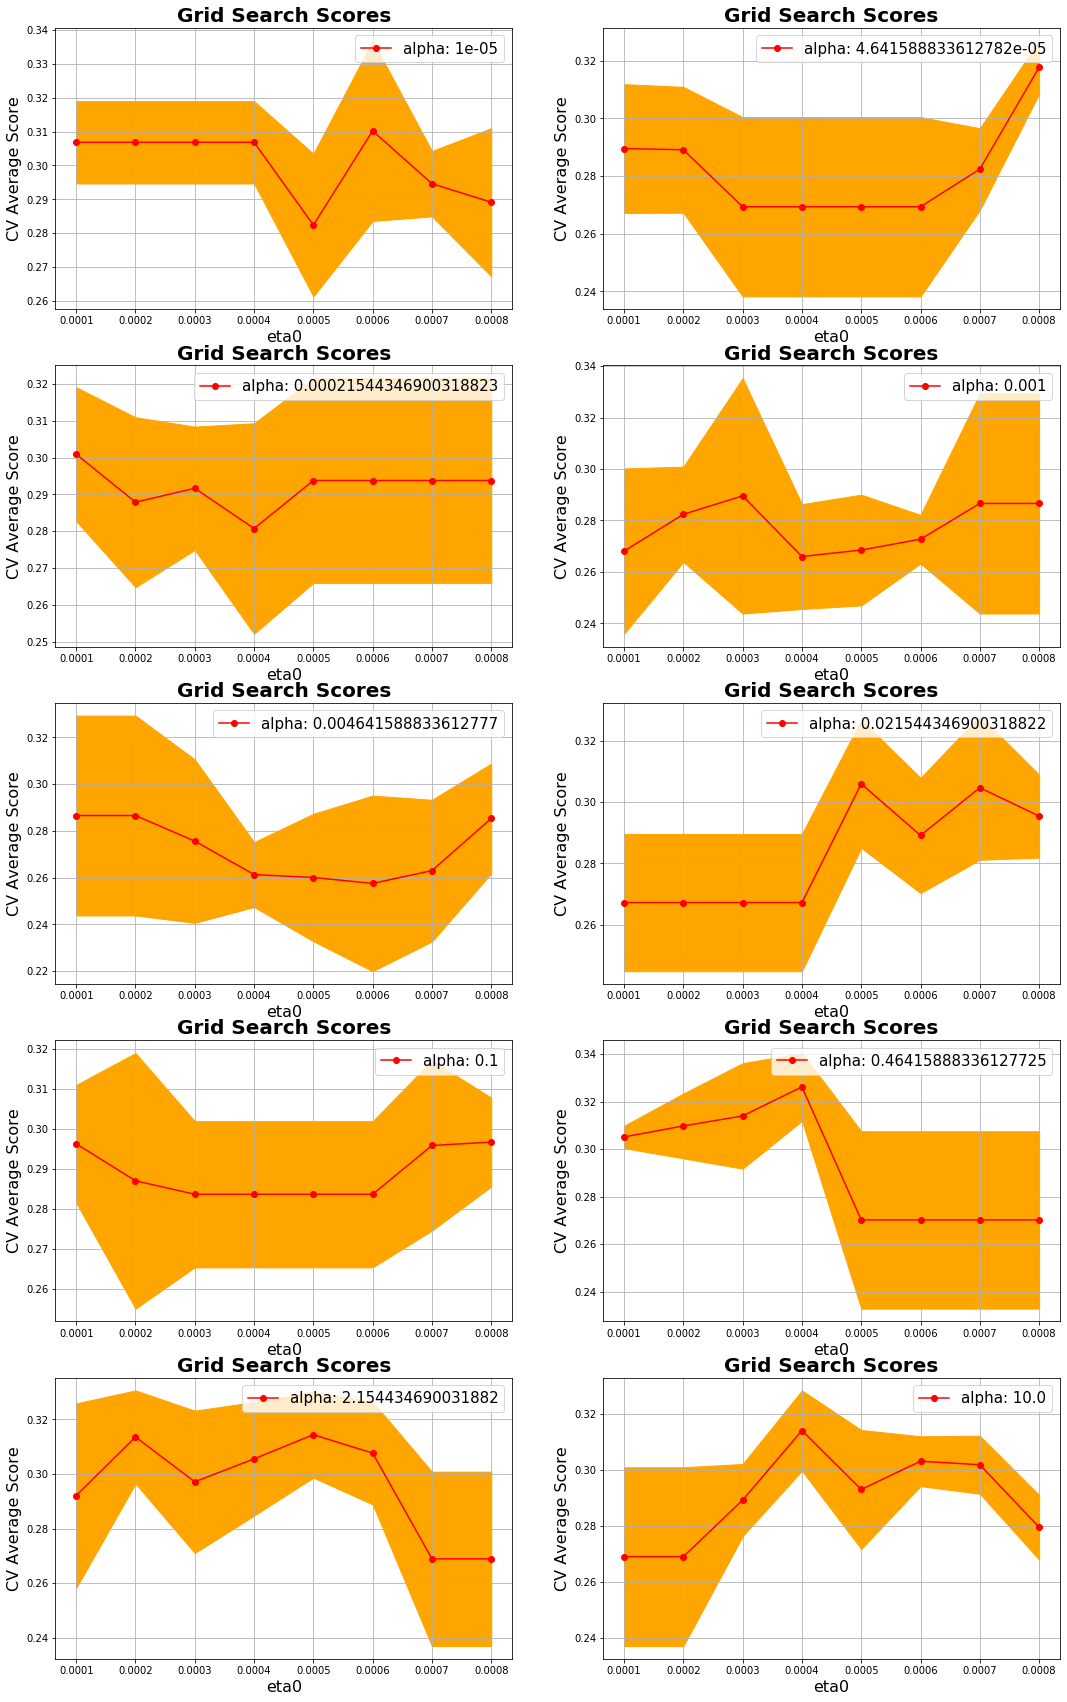

In [23]:
plot_grid_search(grid_perc.cv_results_, params_perceptron['alpha'], params_perceptron['eta0'], 'eta0',  'alpha')

In [24]:
params_mlp = {'hidden_layer_sizes':[(x,) for x in range(200, 220, 10)],
              'learning_rate_init':[0.001, 0.0001],
              'activation':['tanh']}

In [25]:
grid_mlp = GridSearchCV(MLPClassifier(random_state=42, alpha=0.5), param_grid=params_mlp, cv=5, n_jobs=-1, verbose=10)

In [26]:
grid_mlp.fit(train_X, train_y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:  2.7min remaining:   40.9s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.3min finished
/home/den/anaconda3/envs/deeplearning/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.5,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=42, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['tanh'],
                        

In [38]:
hidden_layer_sizes = [x[0] for x in params_mlp['hidden_layer_sizes']]

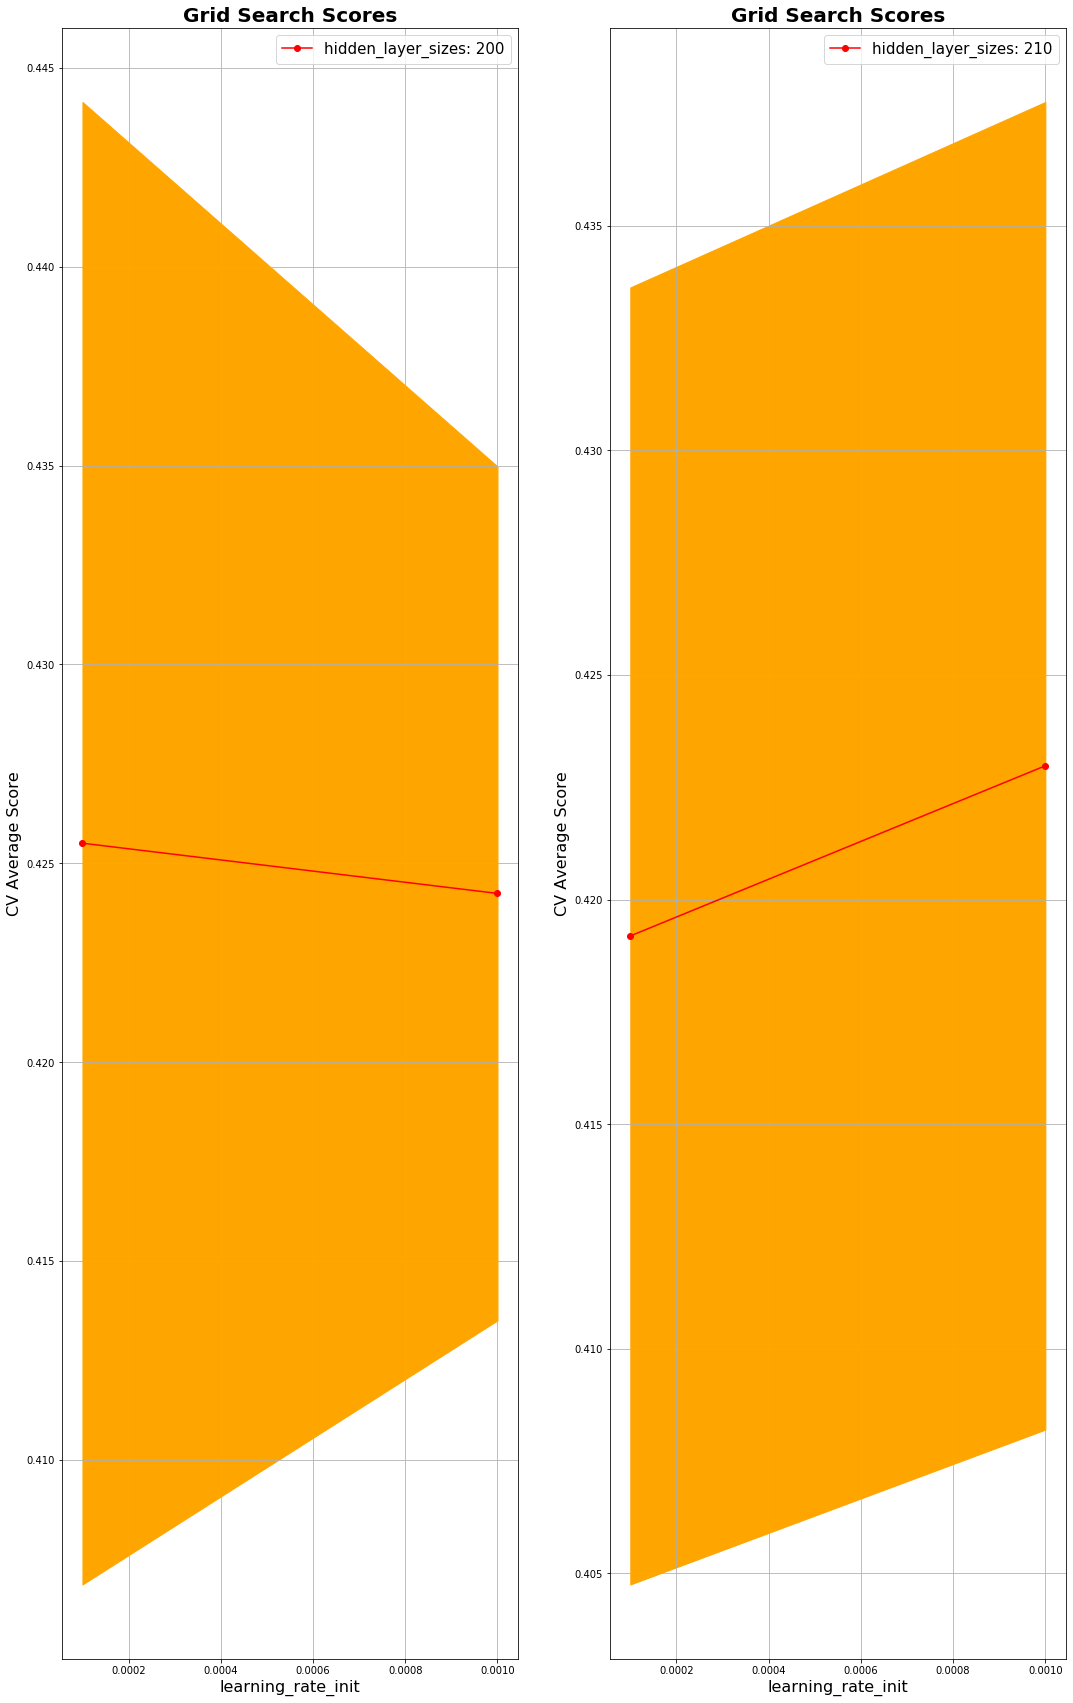

In [39]:
plot_grid_search(grid_mlp.cv_results_, 
                 params_mlp['learning_rate_init'],
                 hidden_layer_sizes, 
                 'learning_rate_init',  
                 'hidden_layer_sizes')

In [27]:
grid_mlp.best_score_

0.4255050505050505

In [28]:
grid_mlp.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': (200,),
 'learning_rate_init': 0.0001}

In [29]:
accuracy_score(grid_mlp.predict(test_X), test_y)

0.39646712463199213

In [30]:
params_mlp['hidden_layer_sizes']
#params_mlp['learning_rate_init']

[(200,), (210,)]

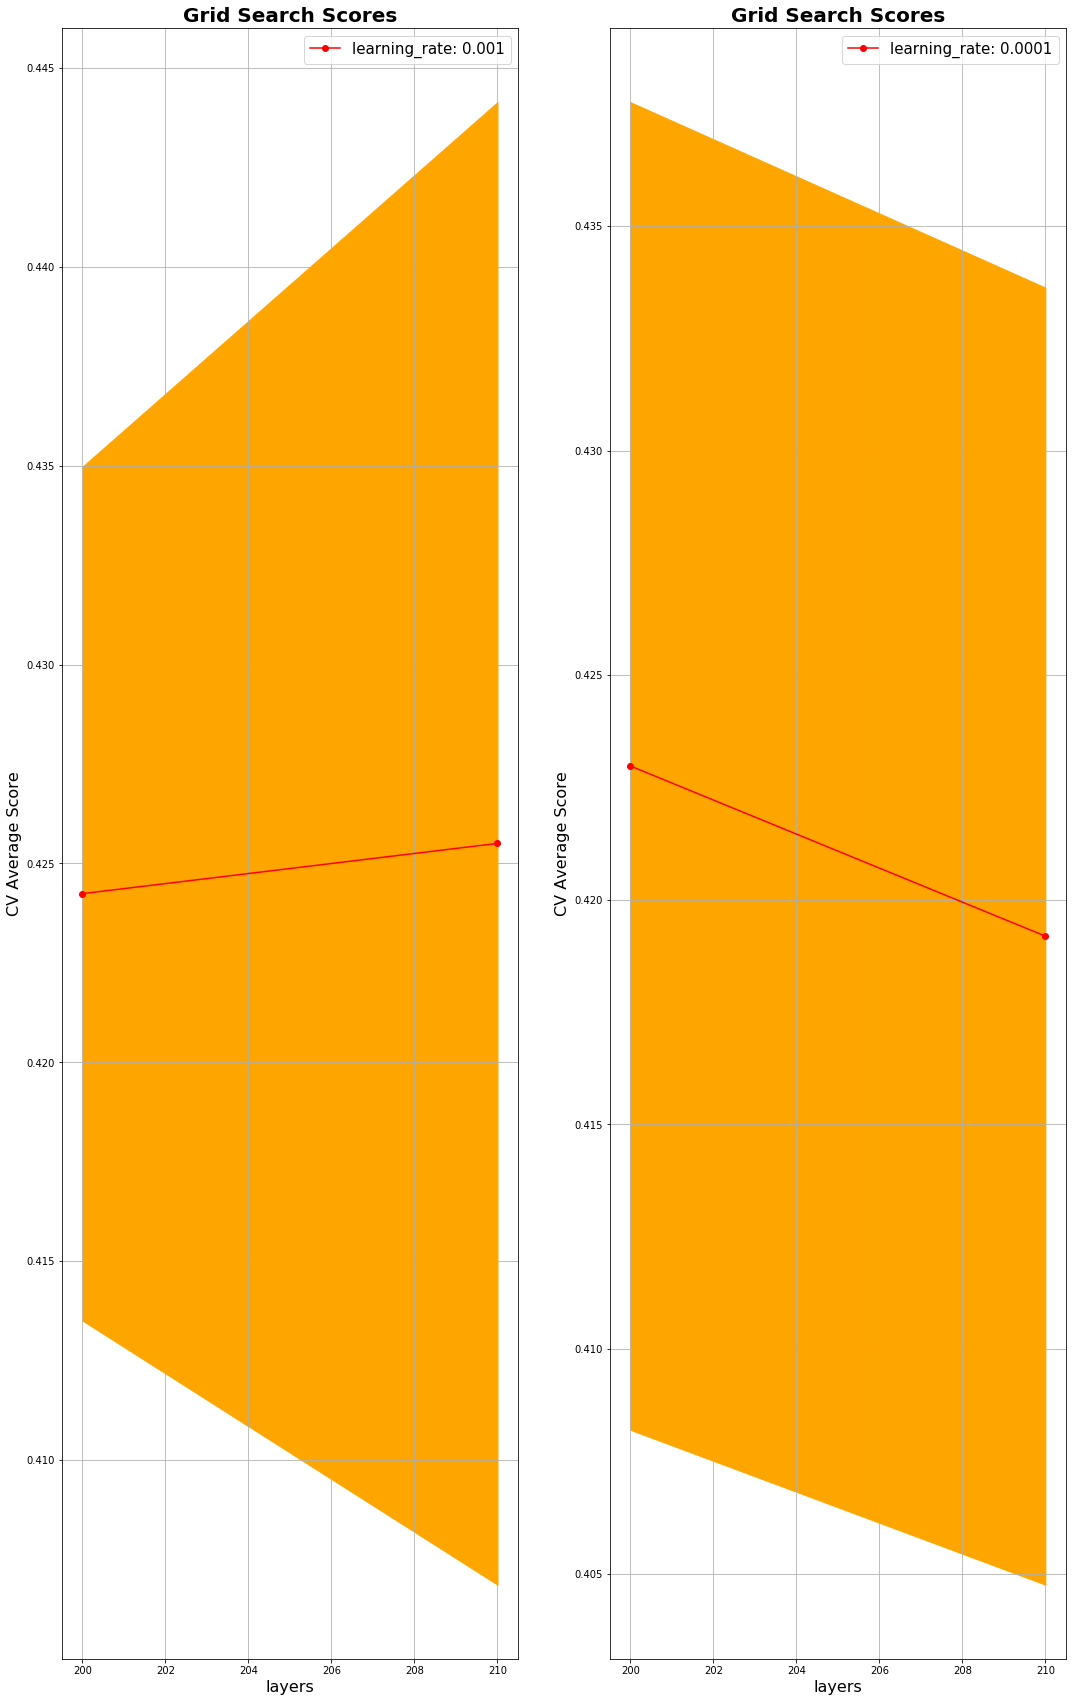

In [31]:

# Calling Method 
hidden_layers = [x[0] for x in params_mlp['hidden_layer_sizes']]
plot_grid_search(grid_mlp.cv_results_, hidden_layers, params_mlp['learning_rate_init'], 'layers', 'learning_rate')

In [32]:
params_perceptron = {
    'alpha' : 10**np.linspace(-20,-1,4),
    'eta0' : 10**np.linspace(-5,-1,4)
}

In [33]:
%%time
perc = Perceptron(n_jobs=-1, random_state=42, tol=None, )
grid_perc = GridSearchCV(perc, param_grid=params_perceptron, n_jobs=-1, cv=3, verbose=True)
grid_perc.fit(train_X, train_y)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   18.0s finished


CPU times: user 2.24 s, sys: 19.7 ms, total: 2.26 s
Wall time: 18.6 s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Perceptron(alpha=0.0001, class_weight=None,
                                  early_stopping=False, eta0=1.0,
                                  fit_intercept=True, max_iter=1000,
                                  n_iter_no_change=5, n_jobs=-1, penalty=None,
                                  random_state=42, shuffle=True, tol=None,
                                  validation_fraction=0.1, verbose=0,
                                  warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-20, 2.15443469e-14, 4.64158883e-08, 1.00000000e-01]),
                         'eta0': array([1.00000000e-05, 2.15443469e-04, 4.64158883e-03, 1.00000000e-01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [34]:
grid_perc.best_params_, grid_perc.best_score_

({'alpha': 1e-20, 'eta0': 1e-05}, 0.30765993265993263)

In [35]:
parameter_space = {
    'hidden_layer_sizes': [(20,), (10,), (100,)],
    'activation': ['identity', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [90]:
grid_mlp = GridSearchCV(MLPClassifier(max_iter=100), param_grid=parameter_space, cv=3, n_jobs=-1, verbose=True)

In [91]:
%%time
grid_mlp.fit(train_X, train_y)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  1.6min finished


CPU times: user 4.68 s, sys: 3.18 s, total: 7.86 s
Wall time: 1min 35s


/home/den/anaconda3/envs/deeplearning/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=100,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_sta...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['identity', 'relu'],
                         '

In [92]:
# Best paramete set
print('Best parameters found:\n', grid_mlp.best_params_)
print(grid_mlp.best_score_)

# All results
means = grid_mlp.cv_results_['mean_test_score']
stds = grid_mlp.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_mlp.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
0.42045454545454547
0.383 (+/-0.038) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.402 (+/-0.021) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}
0.381 (+/-0.021) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.409 (+/-0.022) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.380 (+/-0.013) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.412 (+/-0.009) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'solver': 

In [93]:
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(test_y, grid_mlp.predict(test_X)))

Results on the test set:
              precision    recall  f1-score   support

           1       0.25      0.07      0.11        42
           2       0.37      0.09      0.14       114
           3       0.30      0.33      0.31       163
           4       0.36      0.49      0.41       249
           5       0.37      0.37      0.37       243
           6       0.52      0.55      0.53       181
           7       0.00      0.00      0.00         9
           8       0.89      0.94      0.92        18

    accuracy                           0.39      1019
   macro avg       0.38      0.36      0.35      1019
weighted avg       0.38      0.39      0.37      1019



/home/den/anaconda3/envs/deeplearning/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [94]:
accuracy_score(grid_mlp.predict(test_X),test_y)

0.3886162904808636

In [95]:
def plot_acc(train_acc_mean, train_acc_std, test_acc_mean, test_acc_std, X_ax, name):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(title="Accuracy for {}".format(name))
    
    train_acc_mean = np.array(train_acc_mean)
    train_acc_std = np.array(train_acc_std)
    test_acc_mean = np.array(test_acc_mean)
    test_acc_std = np.array(test_acc_std)    
    
    lines = plt.plot(X_ax, train_acc_mean)
    plt.fill_between(X_ax, train_acc_mean - train_acc_std, train_acc_mean + train_acc_std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)
    lines = plt.plot(X_ax, test_acc_mean)
    plt.fill_between(X_ax, test_acc_mean - test_acc_std, test_acc_mean + test_acc_std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)
    
    ax.set_xlabel(name)
    ax.set_ylabel("Accuracy")
    plt.legend(labels=("Test", "Train"))
    plt.show()

In [96]:
%%time

train_acc_mean = []
train_acc_std = []
test_acc_mean = []
test_acc_std = []

alphas = np.linspace(0,10,10)
for i in alphas:

    mlp = MLPClassifier(alpha=i,hidden_layer_sizes=(25,), random_state=42, max_iter=2000)
    train_score = cross_val_score(mlp, train_X, train_y, cv=4, n_jobs=-1)
    test_score = cross_val_score(mlp, test_X, test_y, cv=4, n_jobs=-1)
    
    train_acc_mean.append(np.mean(train_score))
    train_acc_std.append(np.std(train_score))
    
    test_acc_mean.append(np.mean(test_score))
    test_acc_std.append(np.std(test_score))

CPU times: user 626 ms, sys: 42.5 ms, total: 669 ms
Wall time: 1min 41s


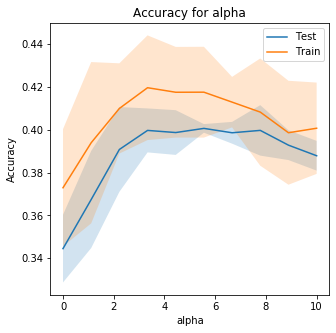

In [97]:
plot_acc(test_acc_mean, train_acc_std, train_acc_mean, test_acc_std, alphas, "alpha")

In [ ]:
%%time

train_acc_mean = []
train_acc_std = []
test_acc_mean = []
test_acc_std = []

alphas = np.linspace(1,100,10)
for i in alphas:
    i=int(i)
    mlp = MLPClassifier(alpha=4,hidden_layer_sizes=(i,), random_state=42, max_iter=2000)
    train_score = cross_val_score(mlp, train_X, train_y, cv=4, n_jobs=-1)
    test_score = cross_val_score(mlp, test_X, test_y, cv=4, n_jobs=-1)
    
    train_acc_mean.append(np.mean(train_score))
    train_acc_std.append(np.std(train_score))
    
    test_acc_mean.append(np.mean(test_score))
    test_acc_std.append(np.std(test_score))
    
plot_acc(test_acc_mean, train_acc_std, train_acc_mean, test_acc_std, alphas, "Layer 1")

In [ ]:
%%time

train_acc_mean = []
train_acc_std = []
test_acc_mean = []
test_acc_std = []

alphas = np.linspace(1,100,10)
for i in alphas:
    i=int(i)
    mlp = MLPClassifier(alpha=4,hidden_layer_sizes=(i,i), random_state=42, max_iter=2000)
    train_score = cross_val_score(mlp, train_X, train_y, cv=4, n_jobs=-1)
    test_score = cross_val_score(mlp, test_X, test_y, cv=4, n_jobs=-1)
    
    train_acc_mean.append(np.mean(train_score))
    train_acc_std.append(np.std(train_score))
    
    test_acc_mean.append(np.mean(test_score))
    test_acc_std.append(np.std(test_score))
    
plot_acc(test_acc_mean, train_acc_std, train_acc_mean, test_acc_std, alphas, "Layer 1&2")

# Learning Curve

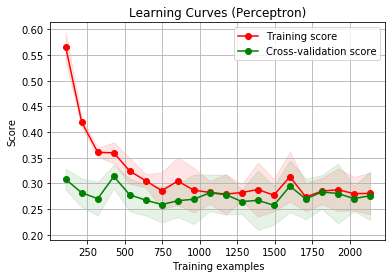

In [74]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


title = "Learning Curves (Perceptron)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
estimator = Perceptron(penalty='l1', alpha=0.005, max_iter=1000)
plot_learning_curve(estimator, title, train_X, train_y, cv=10, n_jobs=-1, 
                    train_sizes=np.linspace(0.05,1,20))

plt.show()

# Validation Curve

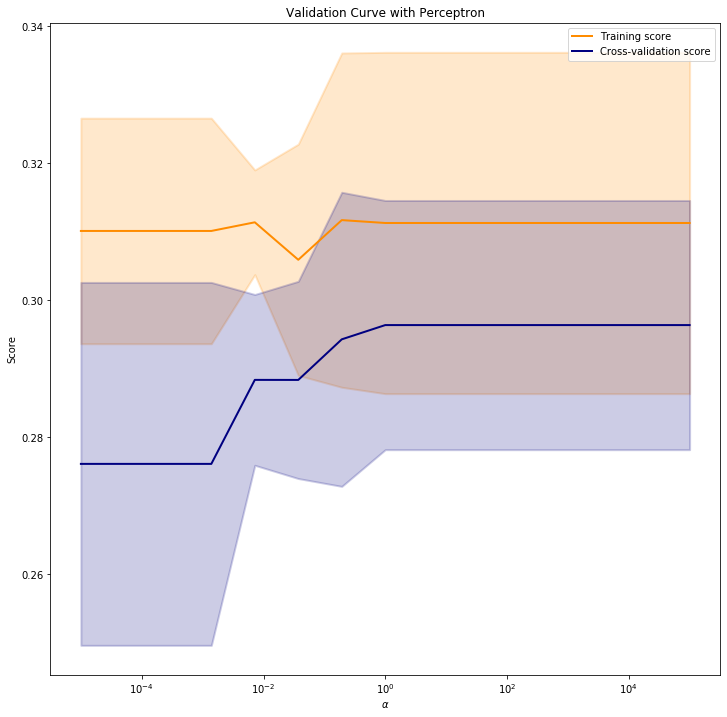

In [75]:
param_range = np.logspace(-5, 5, 15)
train_scores, test_scores = validation_curve(
    Perceptron(), train_X, train_y, param_name="eta0", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(12,12))
plt.title("Validation Curve with Perceptron")
plt.xlabel(r"$\alpha$")
plt.ylabel("Score")
#plt.ylim(0.1, 0.4)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

## Validation Curve MLPClassifier

In [91]:
param_range = np.linspace(0, 0.999, 3)
train_scores, test_scores = validation_curve(
    MLPClassifier(hidden_layer_sizes=(200,50), max_iter=500, 
                  verbose=False, random_state=42, alpha=0.01), 
    train_X, train_y, param_name="beta_1", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=1)

/home/den/anaconda3/envs/deeplearning/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/den/anaconda3/envs/deeplearning/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/den/anaconda3/envs/deeplearning/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/den/anaconda3/envs/deeplearning/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum ite

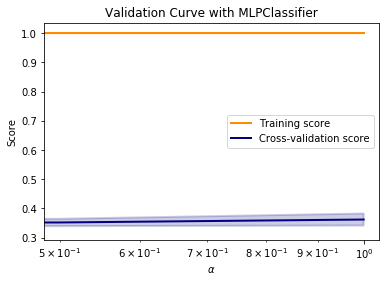

In [92]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with MLPClassifier")
plt.xlabel(r"$\alpha$")
plt.ylabel("Score")
#plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

## Gradient Boosting Classifier

In [93]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [100]:
xgb = GradientBoostingClassifier()
xgb.fit(train_X, train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [101]:
accuracy_score(xgb.predict(test_X), test_y)

0.4072620215897939

<module 'matplotlib.pyplot' from '/home/den/anaconda3/envs/deeplearning/lib/python3.7/site-packages/matplotlib/pyplot.py'>

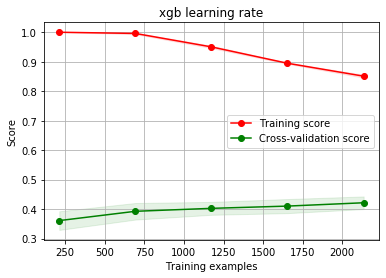

In [105]:
plot_learning_curve(xgb, title="xgb learning rate", X=train_X, y=train_y, cv=10, n_jobs=-1)

## Random Forest Classifier

In [118]:
rf = RandomForestClassifier(n_estimators=100, criterion="entropy", )
rf.fit(train_X, train_y)
accuracy_score(rf.predict(test_X), test_y)

0.40333660451422965

<module 'matplotlib.pyplot' from '/home/den/anaconda3/envs/deeplearning/lib/python3.7/site-packages/matplotlib/pyplot.py'>

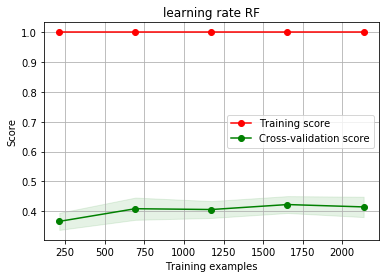

In [119]:
plot_learning_curve(rf, "learning rate RF", train_X, train_y, cv=10, n_jobs=-1)